In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler

In [25]:
train = pd.read_csv("./data/data_washing.csv")
pd.set_option('display.max_columns', None)
print(train.shape)

(7253, 34)


In [26]:
train.head(10)

,p1_sets,p2_sets,sub_set,p1_games,p2_games,sub_game,p1_score,p2_score,server,serve_no,point_victor,p1_points_won,p2_points_won,sub_point,p1_ace,p2_ace,p1_winner,p2_winner,winner_shot_type,p1_double_fault,p2_double_fault,p1_unf_err,p2_unf_err,p1_net_pt,p2_net_pt,p1_net_pt_won,p2_net_pt_won,p1_break_pt,p2_break_pt,p1_break_pt_won,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,nextpoint_victor
0,0,0,0,0,0,0,0,0,1,2,2,0,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,15,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,15,15,1,1,2,1,2,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,15,30,1,1,1,2,2,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,30,30,1,1,1,3,2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
5,0,0,0,0,0,0,40,30,1,2,2,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,40,40,1,1,1,4,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
7,0,0,0,0,0,0,AD,40,1,2,2,4,4,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
8,0,0,0,0,0,0,40,40,1,1,1,5,4,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,AD,40,1,1,1,6,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


特征转换

In [27]:
def transfer_score(score):
    print(type(score))
    if score == "0":
        return 0
    elif score == "15":
        return 1
    elif score == "30":
        return 2
    elif score == "40":
        return 3
    elif score == "AD":
        return 4
    else:
        return int(score)
    
train['p1_score'] = train['p1_score'].apply(transfer_score)
train['p2_score'] = train['p2_score'].apply(transfer_score)



# 新建一个csv文件保存处理后的数据
train.to_csv('./data/Wimbledon_washed_features.csv', index=False)

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [28]:
train.head(10)

,p1_sets,p2_sets,sub_set,p1_games,p2_games,sub_game,p1_score,p2_score,server,serve_no,point_victor,p1_points_won,p2_points_won,sub_point,p1_ace,p2_ace,p1_winner,p2_winner,winner_shot_type,p1_double_fault,p2_double_fault,p1_unf_err,p2_unf_err,p1_net_pt,p2_net_pt,p1_net_pt_won,p2_net_pt_won,p1_break_pt,p2_break_pt,p1_break_pt_won,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,nextpoint_victor
0,0,0,0,0,0,0,0,0,1,2,2,0,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,1,1,1,1,2,1,2,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,2,1,1,1,2,2,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,2,2,1,1,1,3,2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
5,0,0,0,0,0,0,3,2,1,2,2,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,3,3,1,1,1,4,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
7,0,0,0,0,0,0,4,3,1,2,2,4,4,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
8,0,0,0,0,0,0,3,3,1,1,1,5,4,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,4,3,1,1,1,6,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [29]:
# 删除p1_sets p2_sets p1_games p2_games p1_score p2_score
train = train.drop(['p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'p1_score', 'p2_score'], axis=1) 

# 新建一个csv文件保存处理后的数据
train.to_csv('./data/Wimbledon_washed_features.csv', index=False)

train.head(10)

,sub_set,sub_game,server,serve_no,point_victor,p1_points_won,p2_points_won,sub_point,p1_ace,p2_ace,p1_winner,p2_winner,winner_shot_type,p1_double_fault,p2_double_fault,p1_unf_err,p2_unf_err,p1_net_pt,p2_net_pt,p1_net_pt_won,p2_net_pt_won,p1_break_pt,p2_break_pt,p1_break_pt_won,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,nextpoint_victor
0,0,0,1,2,2,0,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0,0,1,1,2,1,2,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,1,1,2,2,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,1,1,1,3,2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
5,0,0,1,2,2,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,1,1,1,4,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
7,0,0,1,2,2,4,4,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
8,0,0,1,1,1,5,4,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
9,0,0,1,1,1,6,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


特征增强（未完成）

特征分析

In [30]:
train_X = train.drop(['nextpoint_victor'], axis=1)
train_Y = train['nextpoint_victor']
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   sub_set             7253 non-null   int64
 1   sub_game            7253 non-null   int64
 2   server              7253 non-null   int64
 3   serve_no            7253 non-null   int64
 4   point_victor        7253 non-null   int64
 5   p1_points_won       7253 non-null   int64
 6   p2_points_won       7253 non-null   int64
 7   sub_point           7253 non-null   int64
 8   p1_ace              7253 non-null   int64
 9   p2_ace              7253 non-null   int64
 10  p1_winner           7253 non-null   int64
 11  p2_winner           7253 non-null   int64
 12  winner_shot_type    7253 non-null   int64
 13  p1_double_fault     7253 non-null   int64
 14  p2_double_fault     7253 non-null   int64
 15  p1_unf_err          7253 non-null   int64
 16  p2_unf_err          7253 non-null   int64


In [33]:
""" from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=[0.001, 0.0005, 0.0001], cv=5)
lasso_cv.fit(train_X, train_Y)

print("Best alpha: ", lasso_cv.alpha_) """

lasso = Lasso(alpha=0.0005)
lasso.fit(train_X, train_Y)

Best alpha:  0.0005


' lasso = Lasso(alpha=0.001)\nlasso.fit(train_X, train_Y) '

In [34]:
FI_lasso = pd.DataFrame({"Feature Importance": lasso.coef_}, index=train_X.columns)

In [35]:
FI_lasso.sort_values("Feature Importance", ascending=False)  # 利用Lasso计算出特征重要性

,Feature Importance
server,0.191360
sub_set,-0.000000
p2_double_fault,0.000000
p1_break_pt_missed,0.000000
p2_break_pt_won,0.000000
p1_break_pt_won,-0.000000
p2_break_pt,0.000000
p1_break_pt,-0.000000
p2_net_pt_won,-0.000000
p1_net_pt_won,-0.000000


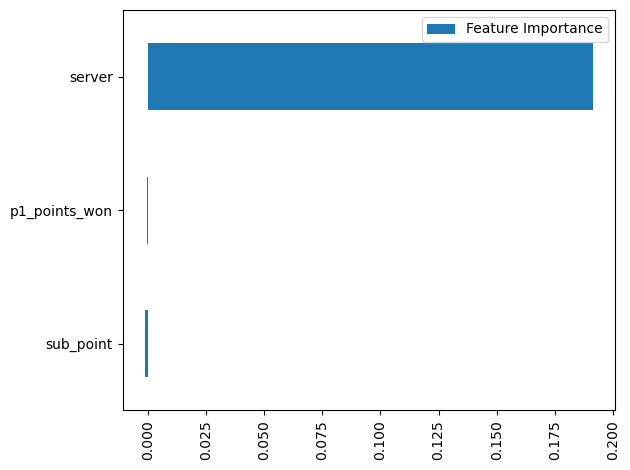

In [52]:
FI_lasso[FI_lasso["Feature Importance"] != 0].sort_values("Feature Importance").plot(kind="barh")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('./image/lasso_feature_importance.png', bbox_inches='tight')
plt.show()

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=42)

# 过采样
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_sm, y_sm)

y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 分析特征重要性
feature_importances = pd.Series(rf.feature_importances_, index=train_X.columns).sort_values(ascending=False)
print(feature_importances)

Accuracy: 0.5527222605099931
              precision    recall  f1-score   support

           1       0.57      0.58      0.57       757
           2       0.53      0.53      0.53       694

    accuracy                           0.55      1451
   macro avg       0.55      0.55      0.55      1451
weighted avg       0.55      0.55      0.55      1451

p1_points_won         0.232291
p2_points_won         0.231185
sub_point             0.198798
sub_game              0.078943
sub_set               0.048235
server                0.047661
serve_no              0.027272
winner_shot_type      0.021698
p1_unf_err            0.012577
point_victor          0.011590
p2_unf_err            0.011521
p2_net_pt             0.011418
p1_net_pt             0.009160
p2_winner             0.009090
p1_winner             0.008465
p2_net_pt_won         0.005535
p1_net_pt_won         0.004411
p2_ace                0.003765
p1_break_pt           0.003733
p1_break_pt_won       0.003423
p1_ace                0.

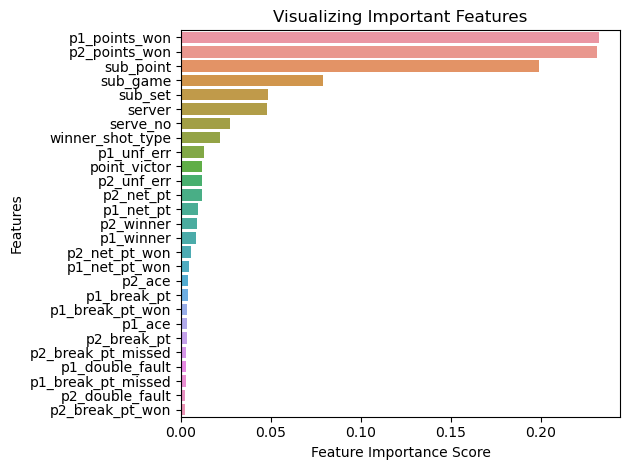

In [50]:
# 可视化
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.tight_layout()
plt.savefig('./image/feature_importance.png', bbox_inches='tight')
plt.show()

采用时序模型进行训练